<a href="https://colab.research.google.com/github/beaten-by-the-market/dart_disclosure/blob/main/buyback_period.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 질문: 코스피 상장사들의 자기주식 취득 결정 후 취득시작시점까지 기간은 어떻게 될까?

자기주식 취득은 아무래도 이런저런 궁금증이 드는 이벤트입니다. <br>***회사의 주식을 회사가 스스로 취득한다..?***
<br>***근데 장내에서 호가를 내서 취득한다..?***
<br>***근데 회사는 주가가 오르면 좋지 않나..?***
<br>***자기주식 취득과정에서 주가가 상승하도록 할 유인이 있지 않나?***
<br>***자기주식 취득 시점을 아는 내부자들도 당연히 있을텐데?***
<br><br>
자본시장법 집행기관들에 의해서 불공정거래는 잘 통제되고 있을 것입니다. 그래도 통상 시장에서는 **자기주식 취득의 Timing이 어떠한 양상을 보이는지 전수조사**{: style="color: #4682B4;"}를 해보고 싶다는 생각이 들긴 합니다. **위법이 아닌 영역에서요.**{: style="color: #4682B4;"}
<br><br>
자기주식 취득의 Timing 중에서 정보의 기점이 되는 주요 구간들을 한번 생각해봤습니다.
* 자기주식 취득**"결정공시"시점 직전**{: style="color: #4682B4;"}<br>- **자기주식을 취득할 것이라는 정보는** (취득규모, 취득후 소각여부에 따라 다르겠지만) **호재**입니다.<br>- 따라서 공시시점 전에 우연히 매수를 할 수 있다면 호재성 정보 덕분에 수익을 얻을 수 있습니다.
* 자기주식 취득결정공시 시점 ~ 자기주식 **"취득기간 시작"시점**{: style="color: #4682B4;"}<br>- 공시는 되었습니다. 즉, 이제 '자기주식을 취득할 것이다'라는 정보는 public해졌습니다.<br>- 그래도 아직 자기주식 취득을 시작하지 않았다면 기회는 있습니다. **자기주식 매수를 위해 호가를 제출하는 과정에서 가격이 상승할 수 있기 때문**입니다.<br>- 따라서 공시시점부터 자기주식 취득기간이 시작하기 전까지의 구간에 주식을 매수한다면 수익을 얻을 수도 있습니다.
* 자기주식 취득결정공시 시점 ~ 매매체결을 의도한 자기주식 **매수호가 제출시점**{: style="color: #4682B4;"}<br>- 3개월가량 되는 취득기간 중에서 **회사가 언제 매수주문을 제출할지 알 수 없습니다.**<br>- 따라서 회사가 매수주문을 내기 전에 우연히 주식을 매수한다면 수익을 볼 수도 있을 것입니다.<br>- 한편 '매매체결을 의도한'이라는 표현을 쓴 것은 관련 규제상(불성실공시 등) 매매체결을 의도하지 않은 주문을 낼 수도 있어서 단서를 붙였습니다.


<br>세가지 경우 모두 투자자의 매매데이터를 갖고 들여다봐야 하겠지만, 두번째 및 세번째 구간의 경우 **기간이 얼마나 길었는지**를 먼저 확인해 볼 필요가 있습니다. <br>예를 들어, **취득결정 공시 바로 다음날**에 취득시작시점이 도래한다면 **두번째 구간은 애초에 0일**이 됩니다. 그러면 **그 기간동안 매수를 한 투자자가 0명**일 것이고 분석의 의미가 없어지게 됩니다. 마찬가지로 **취득결정 공시 바로 다음날에 실제 매수호가를 제출**했다면, **세번째 구간은 애초에 0일이 되고, 분석할 의미가 없어집니다.**

## 파이썬 세팅

* 필요한 패키지 Import

In [1]:
!pip install finance-datareader
import FinanceDataReader as fdr
from pandas import Timestamp

import pandas as pd
import requests
from io import BytesIO, StringIO
from time import sleep
from tqdm import tqdm
from bs4 import BeautifulSoup
import json
import re
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 965.5 kB/s eta 0:00:00


* 시각화를 위한 세팅(코랩)
코랩 환경에서 시각화에 한글이 깨지지 않도록 조치

In [2]:
# 필요한 라이브러리 설치
!pip install adjustText

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from adjustText import adjust_text

# 한글 폰트 설정 (Google Colab 환경에서)
!apt-get update -qq
!apt-get install fonts-nanum* -qq

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

## 자사주 관련 데이터 수집하기

### 자사주 직접 ***취득*** 통계 불러오기

In [3]:
# 사용자 입력 받기
start_y = '2015'
end_y = '2024'
corp_type_input = '유'

# 기본 params 템플릿
params = {
    "pageIndex": "1",
    "pageSize": "10",
    "pageUnit": "10",
    "recordCountPerPage": "1000",
    "sortStdr": "crp",
    "sortOrdr": "asc",
    "sumSortStdr": "",
    "sumSortOrdr": "asc",
    "textCrpCik": "",
    "bgnDe": f"{start_y}-01-01",
    "endDe": f"{end_y}-12-31",
    "textCrpNm": "",
    "startDate": f"{start_y}-01-01",
    "endDate": f"{end_y}-12-31",
    "reportCode": "11332" #직접취득 11332, 직접처분 11333, 신탁취득 11334, 신탁해지 11335
}

# corpType 설정
corp_type_map = {
    "유": "P",
    "코": "A",
    "유코": ["P", "A"]
}

if corp_type_input in corp_type_map:
    params["corpType"] = corp_type_map[corp_type_input]
else:
    print('잘못된 입력입니다. 재실행하세요')

In [4]:
# 첫번째 페이지 크롤링
url = 'https://opendart.fss.or.kr/disclosureinfo/mainMatter/list.do'
req = requests.post(url, params = params)

# 데이터를 수집할 빈 데이터프레임 생성
df_dart_buyback = pd.DataFrame()

# 데이터프레임 파싱
content = req.content.decode('utf-8')
html_string = StringIO(content)  # StringIO로 HTML 문자열 감싸기
df_loop = pd.read_html(html_string)[0]

#데이터프레임 합치기
df_dart_buyback = pd.concat([df_dart_buyback, df_loop])

In [5]:
# beautifulsoup 객체로 전환
soup = BeautifulSoup(content, 'html.parser')

# 끝에서 두번째 div 태그에 페이지 정보가 있음
output_string = soup.find_all('div')[-2].text

import re

# 정규 표현식을 사용하여 숫자 추출
match = re.match(r"\[(\d+)/(\d+)\] \[총 (\d+)건\]", output_string)

if match:
    total_page = int(match.group(2))
    total_counts = int(match.group(3))
    print(f"total_page: {total_page}")
    print(f"total_counts: {total_counts}")
else:
    print("출력물 형식이 올바르지 않습니다.")

total_page: 7
total_counts: 649


In [6]:
for i in range(2, total_page + 1):
  page_index = str(i)
  # params 기준에서 페이지 인덱스만 수정하기
  params["pageIndex"] = page_index

  req = requests.post(url, params = params)
  content = req.content.decode('utf-8')
  html_string = StringIO(content)  # StringIO로 HTML 문자열 감싸기
  df_loop = pd.read_html(html_string)[0]

  # IP차단을 위해 쉬어가기
  sleep(1)

  #데이터프레임 합치기
  df_dart_buyback = pd.concat([df_dart_buyback, df_loop])

In [7]:
# 멀티인덱스를 1단계로 변환 (문자열 변환 추가)
df_dart_buyback.columns = ['_'.join(map(str, filter(None, col))) for col in df_dart_buyback.columns]

# 확인된 값을 바탕으로 칼럼명을 지정
df_dart_buyback.columns = ['회사명', '접수일',
                           '취득예정주식(주)_보통주식', '취득예정주식(주)_기타주식',
                           '취득예정금액(원)_보통주식', '취득예정금액(원)_기타주식',
                           '취득예상기간_시작일','취득예상기간_종료일',
                           '보유예상기간_시작일','보유예상기간_종료일',
                           '취득목적', '취득방법', '위탁투자중개업자',
                           '취득 전 자기주식 보유현황_배당가능이익 범위 내 취득(주)_보통주식',
                           '취득 전 자기주식 보유현황_배당가능이익 범위 내 취득(주)_비율(%)',
                           '취득 전 자기주식 보유현황_배당가능이익 범위 내 취득(주)_기타주식',
                           '취득 전 자기주식 보유현황_배당가능이익 범위 내 취득(주)_비율(%).1',
                           '취득 전 자기주식 보유현황_기타취득(주)_보통주식',
                           '취득 전 자기주식 보유현황_기타취득(주)_비율(%)',
                           '취득 전 자기주식 보유현황_기타취득(주)_기타주식',
                           '취득 전 자기주식 보유현황_기타취득(주)_비율(%).1',
                           '취득결정일',
                           '사외이사참석여부_참석(명)', '사외이사참석여부_불참(명)',
                           '감사 (사외이사가 아닌 감사위원) 참석여부',
                           '1일 매수 주문수량 한도_보통주식', '1일 매수 주문수량 한도_기타주식',
                           '비고']

# 필요한 칼럼만 선택하고 이름을 변경하여 새로운 데이터프레임 생성
df_dart_buyback = df_dart_buyback[['회사명', '접수일',
                           '취득예정주식(주)_보통주식',
                           '취득예정금액(원)_보통주식',
                           '취득예상기간_시작일','취득예상기간_종료일',
                           '보유예상기간_시작일','보유예상기간_종료일',
                           '취득결정일','취득목적', '취득방법']].copy()

df_dart_buyback.columns = ['회사명', '접수일',
                           '취득예정주식','취득예정금액','취득시작일','취득종료일',
                           '보유시작일','보유종료일','취득결정일','취득목적', '취득방법']

# 기존에는 접수일을 datetime으로 변환 및 연도 추출하였으나,
# 공시가 정정될 경우, 연도가 바뀌는 이슈가 있었음
# 그리하여 연도의 기준은 '취득예상기간의 시작일'로 설정함

#다트 편집기를 보면 날짜를 입력하는 형태는 두가지가 있다
#(1) 2022.08.03
#(2) 2022년 08월 03일
#따라서 두번째 형태일 경우 첫번째 형태로 전환하는 함수를 생성한다
def chg_date_format(date_input) :
    if '년' in date_input:
        new_year = date_input[0:4]
        new_month = date_input[6:8]
        new_day = date_input[10:12]
        new_date = new_year + new_month + new_day
    else :
        new_date = date_input
    return new_date

#생성한 함수를 통해서 포맷을 바꿔준다
#취득시작일
df_dart_buyback['취득시작일'] = df_dart_buyback.취득시작일.apply(lambda x : chg_date_format(x))
df_dart_buyback['취득시작일'] = pd.to_datetime(df_dart_buyback['취득시작일'], errors='coerce')
df_dart_buyback['연도'] = df_dart_buyback['취득시작일'].dt.year
#취득결정일
df_dart_buyback['취득결정일'] = df_dart_buyback.취득결정일.apply(lambda x : chg_date_format(x))
df_dart_buyback['취득결정일'] = pd.to_datetime(df_dart_buyback['취득결정일'], errors='coerce')

# 데이터 타입 변경
df_dart_buyback['연도'] = pd.to_numeric(df_dart_buyback['연도'], errors='coerce').astype('Int64')

df_dart_buyback['취득예정주식'] = pd.to_numeric(
    df_dart_buyback['취득예정주식'], errors='coerce').fillna(0)

df_dart_buyback['취득예정금액'] = pd.to_numeric(
    df_dart_buyback['취득예정금액'], errors='coerce').fillna(0) / 1e8  # 원 -> 억 원 변환

# 맨 앞의 '유' 또는 '코' 제거, 맨 끝의 'IR' 제거
df_dart_buyback['회사명'] = df_dart_buyback['회사명'].str.replace(r'^(유|코)', '', regex=True).str.replace(r'  IR$', '', regex=True).str.replace(r'IR$', '', regex=True)

### 자사주 직접취득 : 장내취득 vs 장외취득 구분자 달기

In [8]:
# 정규식 패턴 정의
pattern_mkt = re.compile(r'시장|장내|시간\s?외|거래소')  # '시간 외'와 '시간외'를 모두 포함
pattern_otc_exclude = re.compile(r'시장\s?외')  # '시장 외'와 '시장외'를 모두 포함

# method 열 생성
def categorize_method(method):
    if pattern_mkt.search(method) and not pattern_otc_exclude.search(method):
        return 'mkt'
    else:
        return 'otc'

# 새로운 열에 카테고리 할당
df_dart_buyback['method'] = df_dart_buyback['취득방법'].apply(categorize_method)

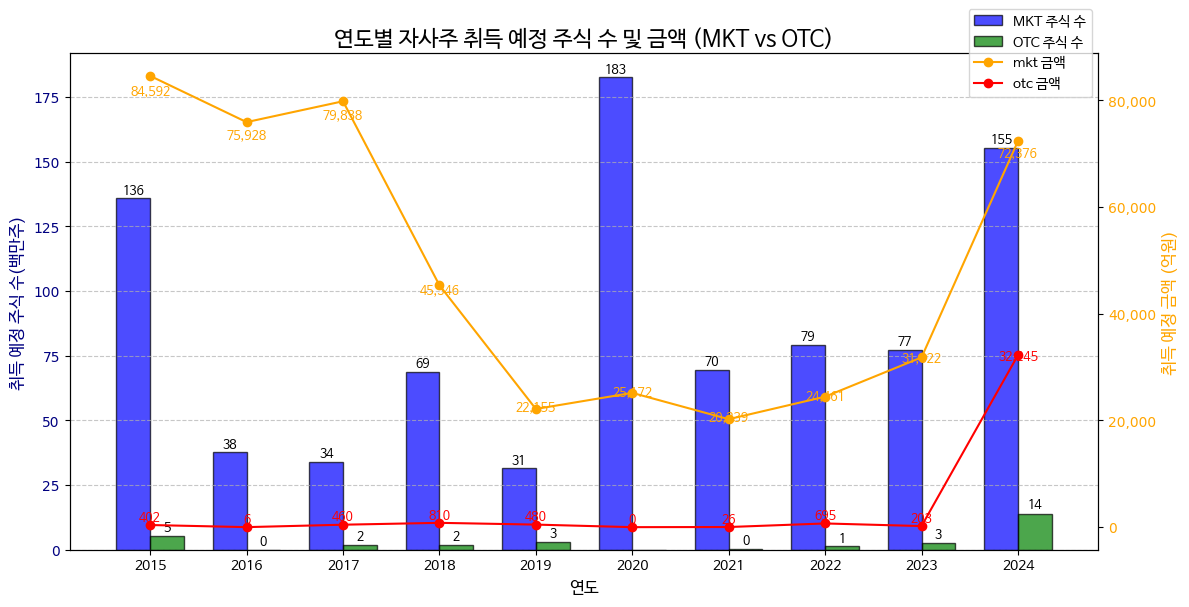

In [9]:
# 연도별 mkt, otc로 나눈 집계
annual_summary = df_dart_buyback.groupby(['연도', 'method']).agg({
    '취득예정주식': 'sum',
    '취득예정금액': 'sum'
}).reset_index()

# 단위 변환
annual_summary['취득예정주식'] = annual_summary['취득예정주식'] / 1000000 # 주 -> 백만주 변환

# 연도별로 mkt와 otc로 나눠서 데이터 생성
mkt_summary = annual_summary[annual_summary['method'] == 'mkt']
otc_summary = annual_summary[annual_summary['method'] == 'otc']

# mkt_summary와 otc_summary의 '연도' 값을 기준으로 outer join 수행
merged_summary = pd.merge(mkt_summary, otc_summary, on='연도', how='outer', suffixes=('_mkt', '_otc'))

# NaN 값을 0으로 채우기
merged_summary.fillna(0, inplace=True)

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대 그래프: mkt와 otc 별로 색상 다르게 표시
bar_width = 0.35  # 막대 폭
indices = merged_summary['연도']  # x축 연도 값
bars_mkt = ax1.bar(indices - bar_width / 2,
                   merged_summary['취득예정주식_mkt'], # mkt 데이터 사용
                   color='blue', edgecolor='black', alpha=0.7, label='MKT 주식 수', width=bar_width)

bars_otc = ax1.bar(indices + bar_width / 2,
                   merged_summary['취득예정주식_otc'], # otc 데이터 사용
                   color='green', edgecolor='black', alpha=0.7, label='OTC 주식 수', width=bar_width)

# 축 라벨 및 눈금 설정
ax1.set_xlabel('연도', fontproperties=font, fontsize=12)
ax1.set_ylabel('취득 예정 주식 수(백만주)', fontproperties=font, fontsize=12, color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
plt.xticks(indices, fontproperties=font, fontsize=10)

# 보조축 추가: mkt와 otc의 라인 그래프
ax2 = ax1.twinx()

line_mkt, = ax2.plot(mkt_summary['연도'],
                     mkt_summary['취득예정금액'] ,
                     color='orange', marker='o', label='mkt 금액')

line_otc, = ax2.plot(otc_summary['연도'],
                     otc_summary['취득예정금액'] ,
                     color='red', marker='o', label='otc 금액')


# y축 보조축에 천 단위 콤마 추가
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.set_ylabel('취득 예정 금액 (억원)', fontproperties=font, fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 데이터 라벨 추가 (막대 및 라인 그래프)
for bar in bars_mkt:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width() / 2, height * 1.00,
                 f'{height:,.0f}', ha='center', va='bottom',
                 fontproperties=font, fontsize=9)

for bar in bars_otc:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width() / 2, height * 1.05,
                 f'{height:,.0f}', ha='center', va='bottom',
                 fontproperties=font, fontsize=9)

for i, value in enumerate(mkt_summary['취득예정금액'] ):
    ax2.text(mkt_summary['연도'].iloc[i], value * 0.95,
             f'{value:,.0f}', color='orange', fontsize=9,
             ha='center', va='bottom', fontproperties=font)

for i, value in enumerate(otc_summary['취득예정금액'] ):
    ax2.text(otc_summary['연도'].iloc[i], value * 0.95,
             f'{value:,.0f}', color='red', fontsize=9,
             ha='center', va='bottom', fontproperties=font)

# y축 그리드 추가
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 범례 추가
fig.legend(loc='right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, prop=font)

# 그래프 제목 설정
plt.title('연도별 자사주 취득 예정 주식 수 및 금액 (MKT vs OTC)', fontproperties=font, fontsize=16)

# 그래프 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

전반적으로 장외취득은 미미한 수준이나, 2024년에 유의미하게 높음
2024년 데이터를 확인해보니, 고려아연에서 발생한 경영권분쟁 관련 공개매수에 의한 것이었음

### 금감원 공시에서 시간외대량매매 구분자 달기

In [10]:
# 정규식 패턴 정의 |
pattern_blockdeal = re.compile(r'대량|시간\s?외')  # 대량, 시간외가 있으면 포함
pattern_otc_exclude = re.compile(r'시장\s?외')  # '시장 외'와 '시장외'를 모두 포함

# method 열 생성
def categorize_method_blockdeal(method):
    if pattern_blockdeal.search(method) and not pattern_otc_exclude.search(method):
        return 'blockdeal'
    else:
        return 'not_bd'

# 새로운 열에 카테고리 할당
df_dart_buyback['blockdeal'] = df_dart_buyback['취득방법'].apply(categorize_method_blockdeal)

In [11]:
# 시간외대량매매가 아닌 장내매매만 발라내기
df_dart_buyback_notbd = df_dart_buyback[(df_dart_buyback['method'] == 'mkt')&
                                        (df_dart_buyback['blockdeal'] == 'not_bd')]

# 확인해보기
print('시간외대량매매가 아닌 장내매매 건수 : '+str(len(df_dart_buyback_notbd)))
df_show = df_dart_buyback_notbd.head(10)

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.head().to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print('상위 10개 행만 확인해보기')
print(html_table)
df_show

시간외대량매매가 아닌 장내매매 건수 : 613
상위 10개 행만 확인해보기
<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>회사명</th>
      <th>접수일</th>
      <th>취득예정주식</th>
      <th>취득예정금액</th>
      <th>취득시작일</th>
      <th>취득종료일</th>
      <th>보유시작일</th>
      <th>보유종료일</th>
      <th>취득결정일</th>
      <th>취득목적</th>
      <th>취득방법</th>
      <th>연도</th>
      <th>method</th>
      <th>blockdeal</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>CJ</td>
      <td>2018-07-05</td>
      <td>287770.0</td>
      <td>400.0003</td>
      <td>2018-07-06</td>
      <td>2018년 10월 05일</td>
      <td>-</td>
      <td>-</td>
      <td>2018-07-05</td>
      <td>주가 안정을 통한 주주가치 제고</td>
      <td>유가증권 시장을 통한 직접 취득</td>
      <td>2018</td>
      <td>mkt</td>
      <td>not_bd</td>
    </tr>
    <tr>
      <td>DB금융투자</td>
      <td>2022-03-08</td>
      <td>650000.0</td>
      <td>39.7150</td>
      <td>2022-03-10</td>
      <td>2022년 06월 08일</td>
      <td>-</td>
      <td>-</

,회사명,접수일,취득예정주식,취득예정금액,취득시작일,취득종료일,보유시작일,보유종료일,취득결정일,취득목적,취득방법,연도,method,blockdeal
1,CJ,2018-07-05,287770.0,400.000300,2018-07-06,2018년 10월 05일,-,-,2018-07-05,주가 안정을 통한 주주가치 제고,유가증권 시장을 통한 직접 취득,2018,mkt,not_bd
2,DB금융투자,2022-03-08,650000.0,39.715000,2022-03-10,2022년 06월 08일,-,-,2022-03-08,주가안정 및 주주가치 제고,장내 매수,2022,mkt,not_bd
3,DB금융투자,2024-09-10,650000.0,38.545000,2024-09-11,2024년 12월 10일,-,-,2024-09-10,기업가치제고 계획상 주주환원정책 이행,장내 매수,2024,mkt,not_bd
4,DB손해보험,2020-01-30,708000.0,305.856000,2020-01-31,2020년 04월 30일,-,-,2020-01-30,주가안정을 통한 주주가치 제고,유가증권시장을 통한 장내매수(직접취득),2020,mkt,not_bd
5,DB손해보험,2020-03-19,3540000.0,925.710000,2020-03-20,2020년 06월 19일,-,-,2020-03-19,주가안정을 통한 주주가치 제고,유가증권시장을 통한 장내매수(직접취득),2020,mkt,not_bd
6,DL이앤씨,2023-10-18,1686219.0,534.531423,2023-10-19,2024년 01월 18일,-,-,2023-10-18,주주가치 제고,유가증권시장을 통한 직접 취득,2023,mkt,not_bd
7,GS건설,2015-10-16,25626.0,6.688386,2015-10-19,2015년 10월 21일,2015년 10월 19일,2016년 01월 18일,2015-10-16,미지급 성과급 지급,장내매수,2015,mkt,not_bd
8,GS건설,2017-03-07,68888.0,20.494180,2017-03-08,2017년 03월 15일,2017년 03월 08일,2017년 06월 07일,2017-03-07,미지급 성과급 지급,장내매수,2017,mkt,not_bd
9,GS건설,2017-06-07,120937.0,36.885785,2017-06-08,2017년 06월 15일,2017년 06월 08일,2017년 09월 07일,2017-06-07,미지급 성과급 지급,장내매수,2017,mkt,not_bd
10,HDC,2017-01-10,2000000.0,924.000000,2017-01-11,2017년 04월 11일,-,-,2017-01-10,주주가치 제고 및 주가 안정화,장내매수,2017,mkt,not_bd


## 거래일 기준으로 취득결정일과 취득시작일 차이를 구해보기

### 코스피200 시세를 불러와서 거래일 리스트를 확보하기

In [12]:
# kospi200 지수 시세를 특정 연도에서부터 현재까지 불러옴
df = fdr.DataReader('KS11', '2015')

# 거래일 추출
trad_days = df.index.to_list()

### 취득결정일과 취득시작일 간 거래일 차이를 구하기

In [13]:
# 명시적 복사본 생성
df_dart_buyback_notbd_diff = df_dart_buyback_notbd.copy()

# 요일을 한국어로 변환하는 함수
def get_korean_weekday(date):
    if pd.isna(date):
        return None
    weekday_dict = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
    return weekday_dict.get(date.weekday())

# '시작요일' 칼럼 추가 (취득시작일 바로 옆에)
start_col_index = df_dart_buyback_notbd_diff.columns.get_loc('취득시작일')
df_dart_buyback_notbd_diff.insert(start_col_index + 1, '시작요일', df_dart_buyback_notbd_diff['취득시작일'].apply(get_korean_weekday))

# '결정요일' 칼럼 추가 (취득결정일 바로 옆에)
decision_col_index = df_dart_buyback_notbd_diff.columns.get_loc('취득결정일')
df_dart_buyback_notbd_diff.insert(decision_col_index + 1, '결정요일', df_dart_buyback_notbd_diff['취득결정일'].apply(get_korean_weekday))

# 'date_diff' 컬럼 생성 (영업일 차이 계산)
df_dart_buyback_notbd_diff['date_diff'] = df_dart_buyback_notbd_diff.apply(
    lambda row: (
        len([d for d in trad_days if row['취득결정일'] <= d <= row['취득시작일']])-1
        if pd.notna(row['취득결정일']) and pd.notna(row['취득시작일']) else 0
    ),
    axis=1
)

### 차이가 많이 났을까? 시각화해보기

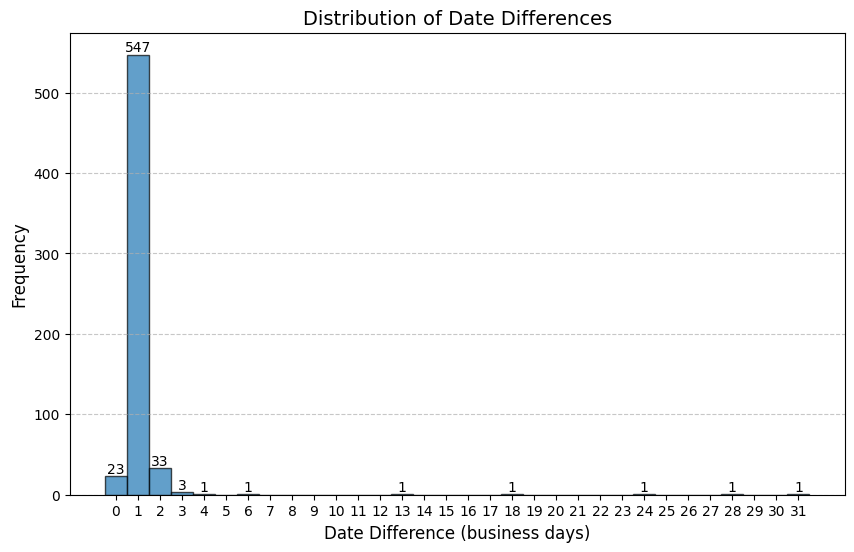

In [14]:
plt.figure(figsize=(10, 6))

# 히스토그램 그리기 및 반환값 저장
counts, bins, bars = plt.hist(df_dart_buyback_notbd_diff['date_diff'],
                             bins=range(int(df_dart_buyback_notbd_diff['date_diff'].min()),
                                       int(df_dart_buyback_notbd_diff['date_diff'].max()) + 2),
                             edgecolor='black', alpha=0.7, align='left')

# 각 막대 위에 데이터 레이블 추가 (값이 0인 경우 제외)
for bar, count in zip(bars, counts):
    height = bar.get_height()
    # 카운트가 0이 아닌 경우에만 레이블 표시
    if count > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height, int(count),
                ha='center', va='bottom', fontsize=10, color='black')

# 나머지 코드는 동일
plt.xticks(np.arange(df_dart_buyback_notbd_diff['date_diff'].min(),
                     df_dart_buyback_notbd_diff['date_diff'].max() + 1, 1))
plt.title('Distribution of Date Differences', fontsize=14)
plt.xlabel('Date Difference (business days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 대부분 결정일 다음날 취득을 개시한다! 그러나 다수의 예외도 있다!

### 거래일 차이가 0인경우는 왜일까?

In [15]:
# 시작일vs결정일이 다른데 날짜차이가 0으로 뜬 경우
print('시작일vs결정일이 다른데 날짜차이가 0으로 뜬 경우 : '+str(len(df_dart_buyback_notbd_diff[(df_dart_buyback_notbd_diff['date_diff'] == 0)&
                                     (df_dart_buyback_notbd_diff['취득시작일'] != df_dart_buyback_notbd_diff['취득결정일'])])))
df_show = df_dart_buyback_notbd_diff[(df_dart_buyback_notbd_diff['date_diff'] == 0)&
                                     (df_dart_buyback_notbd_diff['취득시작일'] != df_dart_buyback_notbd_diff['취득결정일'])]
# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.head(10).to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print('상위 10개 행만 확인해보기')
print(html_table)
print('\n\n')

# 시작일vs결정일이 같은 경우
print('시작일vs결정일이 같은 경우 : '+str(len(df_dart_buyback_notbd_diff[(df_dart_buyback_notbd_diff['date_diff'] == 0)&
                                     (df_dart_buyback_notbd_diff['취득시작일'] == df_dart_buyback_notbd_diff['취득결정일'])])))
df_show = df_dart_buyback_notbd_diff[(df_dart_buyback_notbd_diff['date_diff'] == 0)&
                                     (df_dart_buyback_notbd_diff['취득시작일'] == df_dart_buyback_notbd_diff['취득결정일'])]
# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.head(10).to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print('상위 10개 행만 확인해보기')
print(html_table)
df_show

시작일vs결정일이 다른데 날짜차이가 0으로 뜬 경우 : 17
상위 10개 행만 확인해보기
<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>회사명</th>
      <th>접수일</th>
      <th>취득예정주식</th>
      <th>취득예정금액</th>
      <th>취득시작일</th>
      <th>시작요일</th>
      <th>취득종료일</th>
      <th>보유시작일</th>
      <th>보유종료일</th>
      <th>취득결정일</th>
      <th>결정요일</th>
      <th>취득목적</th>
      <th>취득방법</th>
      <th>연도</th>
      <th>method</th>
      <th>blockdeal</th>
      <th>date_diff</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>JB금융지주</td>
      <td>2017-02-10</td>
      <td>2712000.0</td>
      <td>149.973600</td>
      <td>2017-02-11</td>
      <td>토</td>
      <td>2017년 05월 10일</td>
      <td>-</td>
      <td>-</td>
      <td>2017-02-10</td>
      <td>금</td>
      <td>주가안정 및 주주가치 제고</td>
      <td>유가증권시장 장내매수</td>
      <td>2017</td>
      <td>mkt</td>
      <td>not_bd</td>
      <td>0</td>
    </tr>
    <tr>
      <td>KSS해운</td>
      <td>2018-06-12</td>
      <td>2

,회사명,접수일,취득예정주식,취득예정금액,취득시작일,시작요일,취득종료일,보유시작일,보유종료일,취득결정일,결정요일,취득목적,취득방법,연도,method,blockdeal,date_diff
20,HDC현대EP,2023-10-27,1000000.0,37.100,2023-10-27,금,2024년 01월 25일,-,-,2023-10-27,금,주주가치 제고 및 주가 안정화,유가증권시장을 통한 장내매수(직접 취득),2023,mkt,not_bd,0
44,부광약품,2020-01-08,1916000.0,250.038,2020-01-08,수,2020년 04월 07일,2020년 04월 07일,2020년 04월 07일,2020-01-08,수,자기주식 취득 후 소각 예정,유가증권 시장을 통한 장내 직접 취득,2020,mkt,not_bd,0
72,삼익악기,2021-12-10,2500000.0,43.750,2021-12-10,금,2022년 03월 09일,-,-,2021-12-10,금,주주가치 제고 및 주가안정화,장내매수,2021,mkt,not_bd,0
73,삼익악기,2024-02-22,5000000.0,52.500,2024-02-22,목,2024년 05월 21일,-,-,2024-02-22,목,주주가치 제고 및 주가안정화,장내매수,2024,mkt,not_bd,0
63,아세아,2020-08-25,26490.0,20.000,2020-08-25,화,2020년 11월 24일,-,-,2020-08-25,화,주가안정 및 주주가치 제고,유가증권시장을 통한 장내매수,2020,mkt,not_bd,0
68,한국석유공업,2015-11-03,5000.0,4.995,2015-11-03,화,2016년 02월 02일,-,-,2015-11-03,화,주가 안정화 및 임직원에 대한 성과급 지급,장내매수,2015,mkt,not_bd,0


### 거래일차이가 2일이상인 경우는 어디가 있을까?

In [16]:
df_show = df_dart_buyback_notbd_diff[df_dart_buyback_notbd_diff['date_diff']==2]
print('거래일 차이가 2일인 경우 : '+str(len(df_show))+'\n')

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.head(10).to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print('상위 10개 행만 확인해보기')
print(html_table)
df_show

거래일 차이가 2일인 경우 : 33

상위 10개 행만 확인해보기
<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>회사명</th>
      <th>접수일</th>
      <th>취득예정주식</th>
      <th>취득예정금액</th>
      <th>취득시작일</th>
      <th>시작요일</th>
      <th>취득종료일</th>
      <th>보유시작일</th>
      <th>보유종료일</th>
      <th>취득결정일</th>
      <th>결정요일</th>
      <th>취득목적</th>
      <th>취득방법</th>
      <th>연도</th>
      <th>method</th>
      <th>blockdeal</th>
      <th>date_diff</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>NAVER</td>
      <td>2018-01-25</td>
      <td>133858.0</td>
      <td>1189.997620</td>
      <td>2018-01-26</td>
      <td>금</td>
      <td>2018년 04월 25일</td>
      <td>-</td>
      <td>-</td>
      <td>2018-01-24</td>
      <td>수</td>
      <td>주가안정 도모 및 주주가치 환원</td>
      <td>장내매수</td>
      <td>2018</td>
      <td>mkt</td>
      <td>not_bd</td>
      <td>2</td>
    </tr>
    <tr>
      <td>NAVER</td>
      <td>2019-01-31</td>
      <td>735295.0</td>
     

,회사명,접수일,취득예정주식,취득예정금액,취득시작일,시작요일,취득종료일,보유시작일,보유종료일,취득결정일,결정요일,취득목적,취득방법,연도,method,blockdeal,date_diff
72,NAVER,2018-01-25,133858.0,1189.997620,2018-01-26,금,2018년 04월 25일,-,-,2018-01-24,수,주가안정 도모 및 주주가치 환원,장내매수,2018,mkt,not_bd,2
73,NAVER,2019-01-31,735295.0,1000.001200,2019-02-01,금,2019년 04월 30일,-,-,2019-01-30,수,주가안정 도모 및 주주가치 환원,장내매수,2019,mkt,not_bd,2
74,NAVER,2024-09-30,2347500.0,4011.877500,2024-10-02,수,2024년 12월 28일,-,-,2024-09-27,금,이익소각,장내매수,2024,mkt,not_bd,2
88,SK스퀘어,2024-11-21,1253132.0,1000.000000,2024-11-25,월,2025년 02월 24일,-,-,2024-11-21,목,주주가치 제고,유가증권 시장을 통한 직접 취득,2024,mkt,not_bd,2
66,대원제약,2020-03-24,492611.0,50.000017,2020-03-26,목,2020년 06월 25일,-,-,2020-03-24,화,주가 안정을 통한 주주가치 제고,장내매수,2020,mkt,not_bd,2
34,무학,2020-03-26,500000.0,20.450000,2020-03-30,월,2020년 06월 29일,-,-,2020-03-26,목,주가안정 및 주주가치 제고,유가증권시장을 통한 직접 취득,2020,mkt,not_bd,2
35,무학,2021-11-09,700000.0,59.850000,2021-11-10,수,2022년 02월 09일,-,-,2021-11-08,월,주가안정 및 주주가치 제고,유가증권시장을 통한 직접 취득,2021,mkt,not_bd,2
59,미원상사,2015-04-15,4000.0,6.880000,2015-04-17,금,2015년 07월 16일,-,-,2015-04-15,수,주가안정 및 주주가치 제고,유가증권시장을 통한 직접 취득,2015,mkt,not_bd,2
60,미원상사,2015-07-09,4000.0,6.860000,2015-07-10,금,2015년 10월 09일,-,-,2015-07-08,수,주가안정 및 주주가치 제고,유가증권시장을 통한 직접 취득,2015,mkt,not_bd,2
61,미원상사,2015-10-15,4000.0,7.060000,2015-10-16,금,2016년 01월 15일,-,-,2015-10-14,수,이익소각,유가증권시장을 통한 직접 취득,2015,mkt,not_bd,2


In [17]:
df_show = df_dart_buyback_notbd_diff[df_dart_buyback_notbd_diff['date_diff']>=3]
print('거래일 차이가 3일 이상인 경우 : '+str(len(df_show))+'\n')

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print(html_table)
df_show

거래일 차이가 3일 이상인 경우 : 10

<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>회사명</th>
      <th>접수일</th>
      <th>취득예정주식</th>
      <th>취득예정금액</th>
      <th>취득시작일</th>
      <th>시작요일</th>
      <th>취득종료일</th>
      <th>보유시작일</th>
      <th>보유종료일</th>
      <th>취득결정일</th>
      <th>결정요일</th>
      <th>취득목적</th>
      <th>취득방법</th>
      <th>연도</th>
      <th>method</th>
      <th>blockdeal</th>
      <th>date_diff</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>HD현대건설기계</td>
      <td>2018-11-02</td>
      <td>592000.0</td>
      <td>214.304000</td>
      <td>2018-11-21</td>
      <td>수</td>
      <td>2019년 02월 01일</td>
      <td>-</td>
      <td>-</td>
      <td>2018-11-02</td>
      <td>금</td>
      <td>주가 안정 도모 및 주주가치 제고</td>
      <td>유가증권시장을 통한 장내매수</td>
      <td>2018</td>
      <td>mkt</td>
      <td>not_bd</td>
      <td>13</td>
    </tr>
    <tr>
      <td>TYM</td>
      <td>2023-08-10</td>
      <td>809061.0</td>
     

,회사명,접수일,취득예정주식,취득예정금액,취득시작일,시작요일,취득종료일,보유시작일,보유종료일,취득결정일,결정요일,취득목적,취득방법,연도,method,blockdeal,date_diff
24,HD현대건설기계,2018-11-02,592000.0,214.304000,2018-11-21,수,2019년 02월 01일,-,-,2018-11-02,금,주가 안정 도모 및 주주가치 제고,유가증권시장을 통한 장내매수,2018,mkt,not_bd,13
3,TYM,2023-08-10,809061.0,49.999970,2023-08-16,수,2023년 11월 15일,-,-,2023-08-10,목,주주가치 제고,유가증권 시장을 통한 장내매수,2023,mkt,not_bd,3
30,극동유화,2017-02-28,1200000.0,41.280000,2017-03-06,월,2017년 06월 05일,-,-,2017-02-28,화,주식가격 안정 및 주주가치 제고,장내 직접취득,2017,mkt,not_bd,3
16,두산밥캣,2025-02-21,4393101.0,1999.975026,2024-12-19,목,2025년 02월 19일,-,-,2024-12-16,월,자기주식 소각을 통한 주주가치 제고,장내매수,2024,mkt,not_bd,3
60,아모레퍼시픽,2021-10-29,107817.0,200.000535,2021-12-02,목,2022년 01월 28일,-,-,2021-10-29,금,임직원 성과보상 지급 및 장기근속자 포상,유가증권시장 장내매수,2021,mkt,not_bd,24
61,아모레퍼시픽,2023-10-31,85471.0,100.001070,2023-11-07,화,2024년 01월 30일,-,-,2023-10-30,월,임직원 성과보상 지급 및 장기근속자 포상,유가증권시장 장내매수,2023,mkt,not_bd,6
69,에이리츠,2021-10-01,90498.0,10.000029,2021-11-12,금,2022년 11월 11일,-,-,2021-10-01,금,주가 안정 및 주주가치 제고,유가증권시장을 통한 장내 직접취득,2021,mkt,not_bd,28
27,케이탑리츠,2020-04-21,1852000.0,15.001200,2020-06-08,월,2021년 06월 07일,-,-,2020-04-21,화,주가안정 및 주주가치 제고,유가증권시장을 통한 장내 직접취득,2020,mkt,not_bd,31
28,케이탑리츠,2024-03-07,2000000.0,19.700000,2024-04-01,월,2025년 03월 31일,-,-,2024-03-06,수,주가안정을 통한 주주가치 제고,장내 매수,2024,mkt,not_bd,18
90,한익스프레스,2022-10-26,200000.0,8.570000,2022-11-01,화,2023년 01월 31일,-,-,2022-10-26,수,주가 안정을 통한 주주가치 제고,장내매수,2022,mkt,not_bd,4
